In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

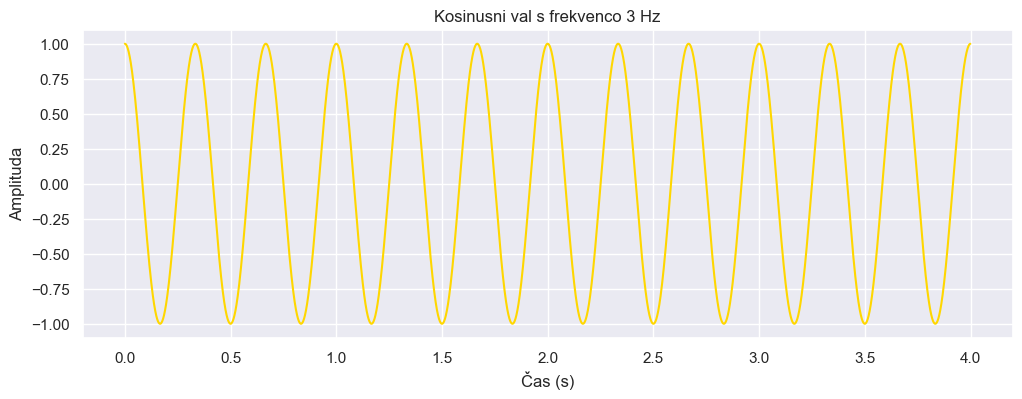

In [15]:
f = 3.0
t = np.arange(0,4,0.001) 

cos_wave = np.cos(2*np.pi*f*t)
# cos_wave = 2*m.cos(2*np.pi*f*t) + 5*m.cos(2*np.pi*f*2*t)

plt.rcParams["figure.figsize"] = (12,4)
plt.plot(t,cos_wave, color='gold')
plt.title("Kosinusni val s frekvenco 3 Hz")
plt.ylabel("Amplituda")
plt.xlabel('Čas (s)');

In [10]:
r_cord = []
min_freq_range = 0.0
max_freq_range = 10.0
sf_list = np.arange(min_freq_range, max_freq_range, 0.1)
for sf in sf_list:
    r_cord.append( [(cos_wave[i], t[i]*sf*2*np.pi) for i in range(len(t)) ] )

In [11]:
x_cord , y_cord = [], []
for l in range(len(r_cord)):
    x_cord.append( [amp*np.cos(theta) for (amp,theta) in r_cord[l]] )
    y_cord.append( [amp*np.sin(theta) for (amp,theta) in r_cord[l]] )

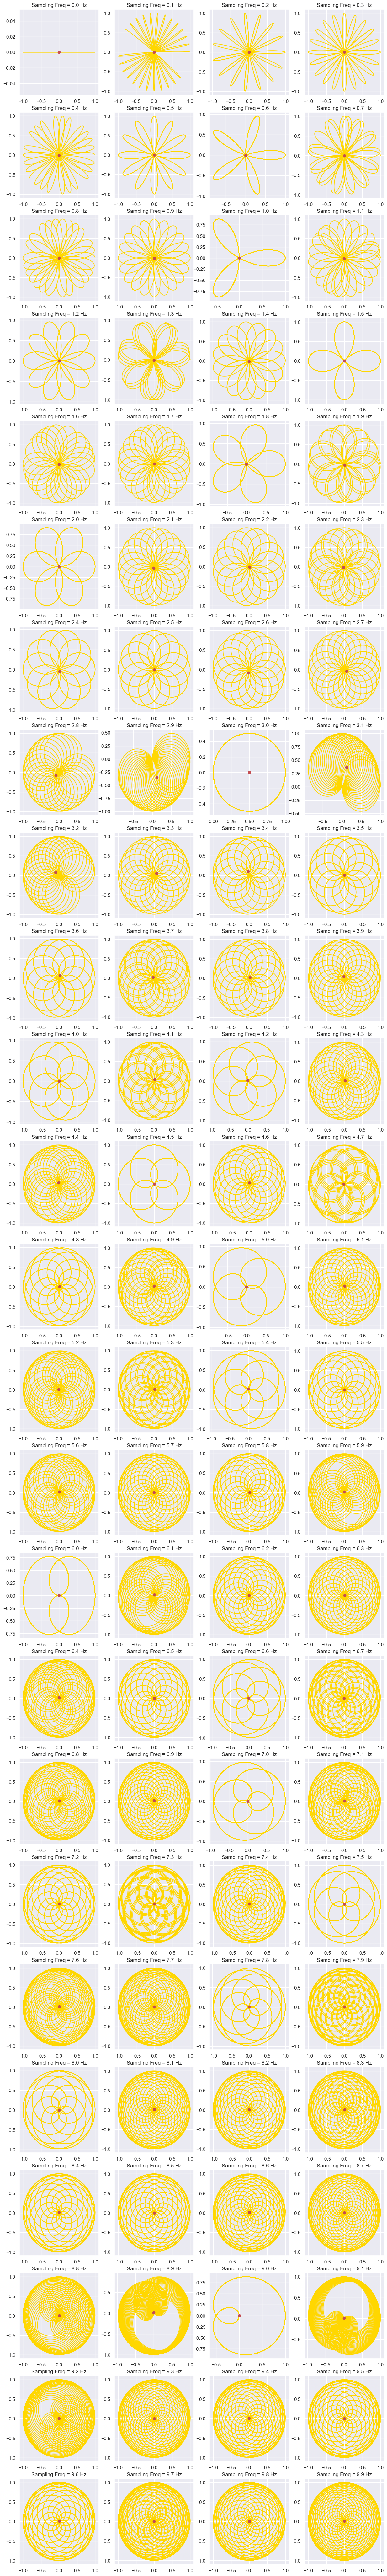

In [16]:
mean_list = []

plt.rcParams["figure.figsize"] = (15,110)
for l in range(len(r_cord)):
    plt.subplot(int(len(r_cord)/4)+1, 4, int(l+1))
    plt.plot(x_cord[l], y_cord[l], color = 'gold')
    plt.plot(np.mean(x_cord[l]), np.mean(y_cord[l]), 'or' )
    plt.title("Sampling Freq = "+str(round(sf_list[l], 2))+" Hz")
    
    # Storing the COM for plotting later
    x_mean = np.sum(x_cord[l])
    mean_list.append(x_mean)

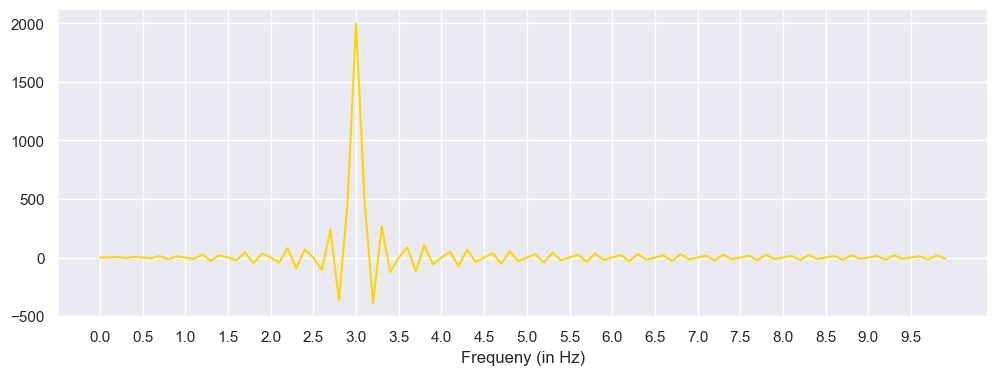

In [17]:

plt.rcParams["figure.figsize"] = (12,4)
plt.xlabel("Frequeny (in Hz)")
plt.xticks(np.arange(min(sf_list), max(sf_list), 0.5))
sns.set()
plt.plot(sf_list,mean_list, color='gold');

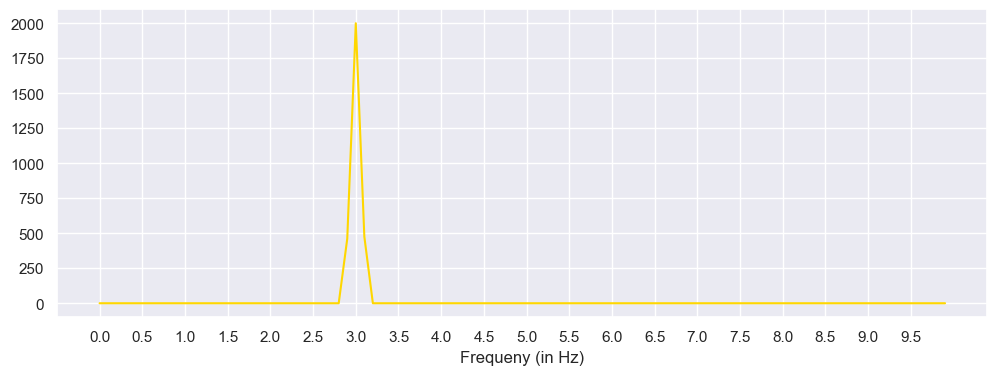

In [18]:
plt.rcParams["figure.figsize"] = (12,4)
smoothed = [i if i>0 and i>0.2*max(mean_list) else 0 for i in mean_list]
plt.plot(sf_list, smoothed, color='gold')
plt.xlabel("Frequeny (in Hz)")
plt.xticks(np.arange(min(sf_list), max(sf_list), 0.5));

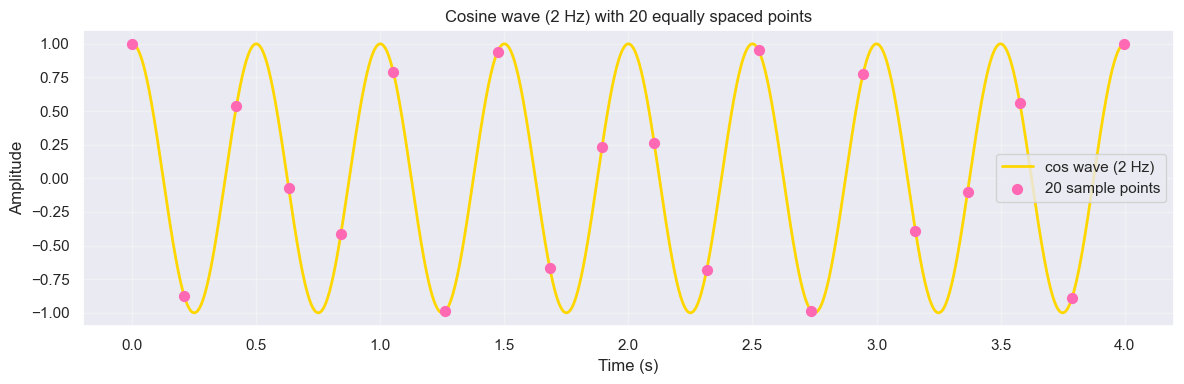

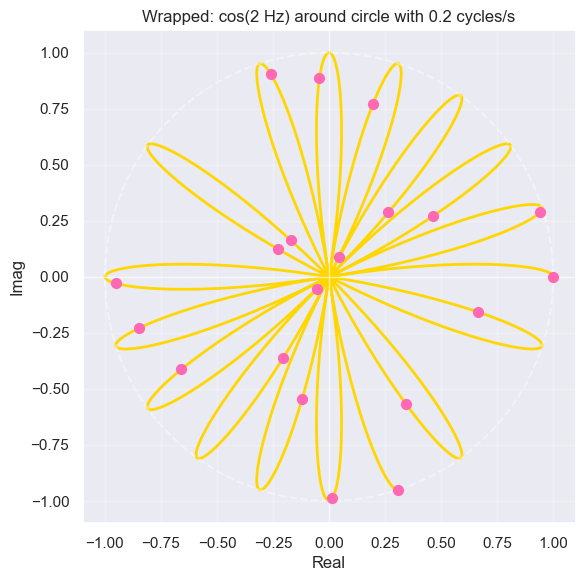

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1) Signal ---
f = 2.0                          # Hz (cos wave)
t = np.arange(0, 4, 0.001)       # 0..2 s
cos_wave = np.cos(2*np.pi*f*t)

# 20 enakomerno razporejenih točk (po času)
n_pts = 20
idx = np.linspace(0, len(t)-1, n_pts, dtype=int)
t_s = t[idx]
y_s = cos_wave[idx]

# --- Slika 1: časovni potek ---
plt.figure(figsize=(12,4))
plt.plot(t, cos_wave, color="gold", linewidth=2, label="cos wave (2 Hz)")
plt.scatter(t_s, y_s, color="hotpink", s=50, zorder=5, label="20 sample points")
plt.title("Cosine wave (2 Hz) with 20 equally spaced points")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

# --- 2) Wrapped around a circle ---
sf = 0.2                         # cycles/second (kot si napisala)
theta = 2*np.pi*sf*t             # kotna pozicija
x = cos_wave * np.cos(theta)
y = cos_wave * np.sin(theta)

# iste točke (isti idx)
theta_s = 2*np.pi*sf*t_s
x_s = y_s * np.cos(theta_s)
y_s_wrapped = y_s * np.sin(theta_s)

plt.figure(figsize=(6,6))
plt.plot(x, y, color="gold", linewidth=2)
plt.scatter(x_s, y_s_wrapped, color="hotpink", s=50, zorder=5)

# referenčna krožnica (radij 1)
phi = np.linspace(0, 2*np.pi, 600)
plt.plot(np.cos(phi), np.sin(phi), "w--", alpha=0.4)

plt.axhline(0, color="white", linewidth=1, alpha=0.6)
plt.axvline(0, color="white", linewidth=1, alpha=0.6)
plt.gca().set_aspect("equal", "box")
plt.title("Wrapped: cos(2 Hz) around circle with 0.2 cycles/s")
plt.xlabel("Real")
plt.ylabel("Imag")
plt.grid(True, alpha=0.25)
plt.tight_layout()

plt.show()
